In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
tire_useability_df = pd.read_excel("./data/Tire_useability.xlsx")
tire_useability_df.head()

,Miles_driven,Percentage_Useable
0,1,98.2
1,2,91.7
2,5,81.3
3,10,64.0
4,20,36.4


In [4]:
print("Size of the data : ", tire_useability_df.shape)

Size of the data :  (8, 2)


Text(0, 0.5, 'Percentage Useable')

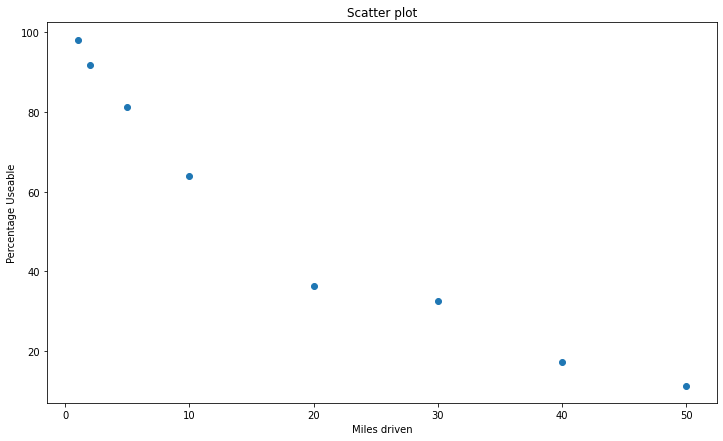

In [5]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable", data = tire_useability_df)
plt.title("Scatter plot")
plt.xlabel("Miles driven")
plt.ylabel("Percentage Useable")

In [6]:
tire_useability_df["log_Percentage_Useable"] = np.log(tire_useability_df["Percentage_Useable"])

In [7]:
tire_useability_df.head()

,Miles_driven,Percentage_Useable,log_Percentage_Useable
0,1,98.2,4.587006
1,2,91.7,4.518522
2,5,81.3,4.398146
3,10,64.0,4.158883
4,20,36.4,3.594569


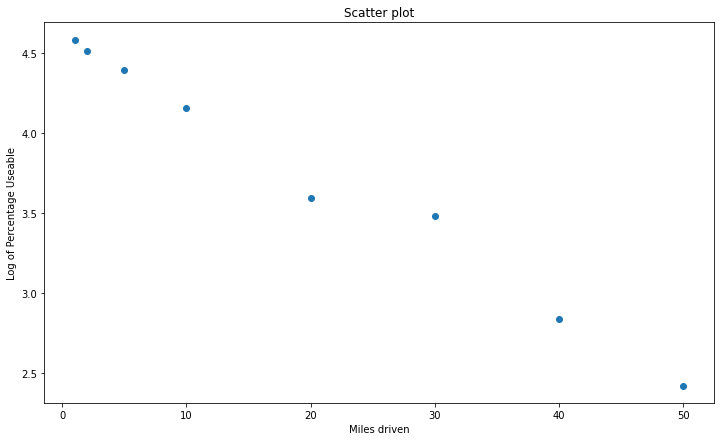

In [8]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "log_Percentage_Useable",data = tire_useability_df)
plt.title("Scatter plot")
plt.xlabel("Miles driven")
plt.ylabel("Log of Percentage Useable")
plt.show()

In [9]:
import statsmodels.formula.api as smf
expo_reg = smf.ols(formula='log_Percentage_Useable ~ Miles_driven ', data = tire_useability_df).fit()

In [10]:
expo_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_Percentage_Useable   R-squared:                       0.988
Model:                                OLS   Adj. R-squared:                  0.986
Method:                     Least Squares   F-statistic:                     492.0
Date:                    Tue, 19 Jan 2021   Prob (F-statistic):           5.49e-07
Time:                            22:28:32   Log-Likelihood:                 8.5732
No. Observations:                       8   AIC:                            -13.15
Df Residuals:                           6   BIC:                            -12.99
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6046      0.051     89.850      0.000       4.479       4.730
Miles_driven    -0.0432      0.002    -22.182      0.000      -0.048      -0.038
==============================================================================
Omnibus:                        3.910   Durbin-Watson:                   3.060
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                0.581
Skew:                           0.533   Prob(JB):                        0.748
Kurtosis:                       3.779   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
predictions = expo_reg.predict(tire_useability_df[["Miles_driven"]])

Text(0, 0.5, 'Log of Percentage Useable')

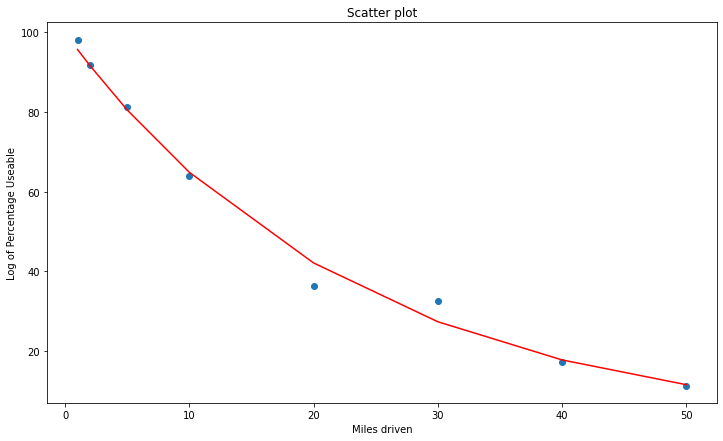

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable",data = tire_useability_df)
plt.plot(tire_useability_df["Miles_driven"],np.exp(predictions),'r')
plt.title("Scatter plot")
plt.xlabel("Miles driven")
plt.ylabel("Log of Percentage Useable")